---
<div class="alert alert-block alert-success">

## Комментарий от наставника

Привет! Спасибо за выполненный проект, круто сделано. 

Отмечу очень подробно исследовательский анализ данных и множество полезных выводов. Получилось наглядно и полезно для бизнеса. Часть про кластеризацию и гипотезы тоже неплохо получилась. Презентация клевая)
    
Добавил по коду небольшие рекомендации на будущие проекты. В целом получился проект профессионального аналитика, поздравляю!
</div>

---

<div class="alert alert-info" role="alert"> 
    
# Выявление профилей потребления

### Проанализируем имеющиеся данные, сегментируем покупателей по профилю потребления, а также дадим ряд рекомендаций по увеличению объемов продаж за счет внедрения новых подходов:
### 1. Сделать рекомендательную систему для различных типов покупаталей.
### 2. Улучшить показатели email-рассылок клиентам.
### 3. Лучше готовиться к сезонным распродажам.
</div>

<div class="alert alert-info" role="alert"> 

# Содержание проекта:

* [1. **Чтение и предобработка данных**](#read_data)
* [2. **Исследовательский анализ данных**](#EDA)
* [3. **Сегментация пользователей на основе истории их покупок**](#segment)
* [4. **Проверка статистических гипотез**](#stat)
* [5. **Выводы**](#total)

</div>

<div class="alert alert-info" role="alert"> 

## 1. Чтение и предобработка данных <a class="anchor" id="read_data"></a> 
</div>

In [2]:
# Подключаем все необходимые библиотеки:
import pandas as pd
from pymystem3 import Mystem
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from scipy import stats as st
import scipy.stats as stats

# Отключаем предупреждения библиотеки warnings:
import warnings
warnings.filterwarnings('ignore')

# Загрузим библиотеки для проведения визуализации:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Загрузим библиотеки для машинного обучения
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [3]:
#откроем исходный датасет
data = pd.read_csv('/Users/Любовь/Downloads/ecommerce_dataset.csv')
data.head(20)

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0
5,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Шеффлера Лузеана d-9 см,1,164.0
6,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Юкка нитчатая d-12 см h-25-35 см,1,134.0
7,2018100108,375e0724-f033-4c76-b579-84969cf38ee2,68479,Настенная сушилка для белья Gimi Brio Super 100,1,824.0
8,2018100108,6644e5b4-9934-4863-9778-aaa125207701,68478,"Таз пластмассовый 21,0 л круглый ""Водолей"" С61...",1,269.0
9,2018100109,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,Чехол для гладильной доски Colombo Persia Beig...,1,674.0


In [4]:
#посмотрим информацию по датасету
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
date           6737 non-null int64
customer_id    6737 non-null object
order_id       6737 non-null int64
product        6737 non-null object
quantity       6737 non-null int64
price          6737 non-null float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB


Как мы видим, в таблице отсутствуют пропуски, в целом данные нужного формата, за исключением столбца с датой. Приведем его к нужному формату.

In [5]:
data['date'] = pd.to_datetime(data['date'], format='%Y%m%d%H')
data.head()

,date,customer_id,order_id,product,quantity,price
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


In [6]:
#посмотрим на столбец с датой подробнее
data['date'].describe()

count                    6737
unique                   2606
top       2019-04-27 16:00:00
freq                       51
first     2018-10-01 00:00:00
last      2019-10-31 16:00:00
Name: date, dtype: object

Мы видим, что у нас имеются данные за период 01.10.2018-31.10.2019. Этих данных будет достаточно для анализа. 

In [7]:
#посмотрим наш датасет на нулевые значения
print(pd.isnull(data).sum())

date           0
customer_id    0
order_id       0
product        0
quantity       0
price          0
dtype: int64


Как мы видим, нулевые значения отсутствуют.

In [8]:
#проверим данные на дубликаты
data.drop_duplicates().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6737 entries, 0 to 6736
Data columns (total 6 columns):
date           6737 non-null datetime64[ns]
customer_id    6737 non-null object
order_id       6737 non-null int64
product        6737 non-null object
quantity       6737 non-null int64
price          6737 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 368.4+ KB


Как мы видим, дубликаты отсутствуют.

In [9]:
#добавим новый столбец, который будет учитывать общую сумму по заказу
data['total'] = data['quantity']*data['price']
data.head()

,date,customer_id,order_id,product,quantity,price,total
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,142.0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,194.0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,112.0
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,179.0
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,112.0


In [10]:
#посмотрим на столбец total более пристально
data['total'].describe()

count      6737.000000
mean        720.094998
std        8352.100591
min           9.000000
25%         120.000000
50%         162.000000
75%         600.000000
max      675000.000000
Name: total, dtype: float64

Мы видим, что есть сумма, которая значительно выделяется из общей массы. Посмотрим, что это за значение.

In [11]:
data[data['total'] == 675000]

,date,customer_id,order_id,product,quantity,price,total
5456,2019-06-18 15:00:00,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,"Вантуз с деревянной ручкой d14 см красный, Bur...",1000,675.0,675000.0


---

<div class="alert alert-block alert-warning">
    

## Комментарий от наставника


Неплохой вариант. Практичнее конечно сразу построить распределение цен и проверить нет ли других подобных значений. Но в этом случае их действительно нет.
</div>

---

Эта строка значительно выделяется из всей массы заказов, поэтому лучше всего её удалить из анализа, но мы будем помнить про этого клиента. Следующие данные мы не планируем удалять, чтобы правильно провести сегментацию клиентов и дать соответствующие рекомендации.

count     6736.000000
mean       619.994062
std       1500.616128
min          9.000000
25%        120.000000
50%        162.000000
75%        600.000000
max      49432.000000
Name: total, dtype: float64

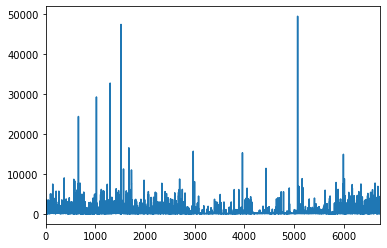

In [12]:
#создадим новый датасет и построим график.
data_new = data.query('total != 675000')
data_new['total'].plot()
data_new['total'].describe()

Оставим пока, как есть, и посмотрим подробнее в 3 разделе. 

In [13]:
#приведем столбец с наименованием товара к нижнему регистру
data_new['product'] = data_new['product'].str.lower()
data_new.head()

,date,customer_id,order_id,product,quantity,price,total
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,142.0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,194.0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,112.0
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,179.0
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,112.0


Выделим категории для наших товаров. Мы видим, что, как правило, основная информация для определения категории содержится в первых двух словах столбца 'product'. 

In [14]:
#разделим данный столбец на несколько столбцов
data_new[['cat1', 'cat2', '1', '2', '3', '4,', '5,',
       '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16',
       '17', '18', '19', '20']] = pd.DataFrame(data['product'].str.split(' ', expand=True).values,
                                                  index=data.index)

In [15]:
#посмотрим на самые популярные значения в столбце cat1
data_new['cat1'].value_counts().head(20)

Рассада          1372
Пеларгония        797
Сумка-тележка     337
Сушилка           310
Муляж             207
Петуния           163
томата            162
Гладильная        144
Коврик            121
Герань            116
Калибрахоа        102
Тележка           100
Чехол              95
Бакопа             90
Штора              90
Таз                86
Тагетис            77
Однолетнее         73
Роза               58
Искусственный      57
Name: cat1, dtype: int64

In [16]:
#посмотрим на уникальные значения в столбце cat1
data_new['cat1'].unique()

array(['Комнатное', 'Радермахера', 'Хризолидокарпус', 'Циперус',
       'Шеффлера', 'Юкка', 'Настенная', 'Таз', 'Чехол', 'Вешалка',
       'Сушилка', 'Крючок', 'Корзина', 'Мини-сковорода', 'Сковорода',
       'Стеклянная', 'Доска', 'Сумка-тележка', 'Многолетнее', 'Рассада',
       'Муляж', 'Щетка-сметка', 'Сумка', 'Тарелка', 'Вилка', 'Ложка',
       'Нож', 'Герань', 'Ерш', 'Пеларгония', 'Котел', 'Суккулент',
       'Эхеверия', 'Набор', 'Коврик', 'Подкладка', 'Дозатор', 'Ёрш',
       'Эвкалипт', 'Цветок', 'Мусорный', 'Плед', 'Скатерть', 'Кувшин',
       'Адиантум', 'Ковер', 'Перчатки', 'Стремянка', 'Гладильная',
       'Лестница-стремянка', 'Толкушка', 'Тележка', 'Готовая',
       'Искусственный', 'Простыня', 'Чайник', 'Штора', 'Банка', 'Стяжка',
       'Комплект', 'Кампанула', 'Декоративная', 'Противень', 'Калатея',
       'Нолина', 'Плечики', 'Подушка', 'Полотенце', 'Хлорофитум',
       'Цикламен', 'Крепеж', 'Пружина', 'Глоксиния', 'Азалия',
       'Гортензия', 'Хризантема', 'Петля', 

In [17]:
#посмотрим на самые популярные значения в столбце cat2
data_new['cat2'].value_counts().head(10)

для              727
Кабачка          462
зональная        422
зелени           295
розебудная       283
2-х              171
(помидор)        162
хозяйственная    156
Огурец           155
Патиссона        150
Name: cat2, dtype: int64

In [18]:
#посмотрим на уникальные значения в столбце cat2
data_new['cat2'].unique()

array(['растение', 'd-12', 'Лутесценс', 'Зумула', 'Лузеана', 'нитчатая',
       'сушилка', 'пластмассовый', 'для', 'Eurogold', 'одежный', 'мягкая',
       'Marmiton', 'алюминиевая', 'крышка', 'гладильная', '2-х', 'зелени',
       '"Райские', 'Банан,', 'Виноград', 'ГРАНАТ', 'Груша', 'Груша,',
       'Зеленое', 'Клубника', 'Красное', 'Лимон,', 'Мандарин,', 'Перец,',
       'Персики', 'Томат,', 'ЧЕРЕШНЯ', '3-х', '4-х', 'обеденная',
       'столовая', 'чайная', 'столовый', 'домашняя', 'зональная',
       'алюминиевый', 'Микс', 'Перл', 'прищепок', 'придверный',
       'Bacchetta', 'пластиковая', 'под', 'кружек', 'интерьерный',
       'унитазный', 'Гунни', 'Виноград,', 'Вишня,', 'Персик,', 'фужеров',
       'искусственный', 'хозяйственная', 'контейнер', 'флисовый',
       'Династия', 'хлопковый', 'Перец', 'Лиза', 'латексные', 'доска',
       'Dogrular', 'багажная', 'скатерть', 'цветок', 'на',
       'эмалированный', 'вешалок', 'текстильная', 'со', 'оконная',
       'ковров', 'Апельсин', 'Ябл

Теперь создадим словарь. который позволит нам отнести тот или иной товар к определенной категории. В качестве ориентира был взять сайт "Есть все" (https://chelyabinsk.allithave.ru/).

Для распределения по категориям понадобился справочник по цветоводству: http://www.plantopedia.ru/encyclopaedia/

In [19]:
new_voc = {'оформление интерьера': ['искусственный', 'муляж', 'кашпо', 'фоторамка',  'новогоднее', 'ваза', 'искусственная', 
                                    'пуф'],
           'бытовая техника': ['чайник',  'миксер', 'измельчитель', 'электроштопор', 'мантоварка-пароварка', 'овощеварка', 
                                'термостакан', 'термокружка', 'термос', 'фен', 'утюг', 'пылесос', 'соковыжималка', 'кипятильник'],
           'комнатные растения': ['комнатное', 'мимоза', 'хризолидокарпус', 'циперус','шеффлера', 'юкка', 'герань', 
                                  'пеларгония', 'суккулент','эхеверия', 'цветок','адиантум','кампанула', 'калатея','нолина', 
                                  'хлорофитум','цикламен', 'глоксиния', 'азалия','гортензия', 'хризантема','мирт','иссоп',
                                  'сантолина', 'аспарагус' , 'афеляндра', 'антуриум', 'молодило', 'фиалка', 'гербера','роза', 
                                  'альбука','бальзамин', 'крассула', 'каланхое', 'примула',  'дендробиум','аспарагус', 
                                  'калоцефалус', 'капсикум', 'соланум', 'диффенбахия','фаленопсис','пуансетия', 'гиностемма', 
                                  'аптения', 'бакопа', 'лавр', 'виола', 'папоротник', 'фуксия', 'цитрофортунелла', 'пеперомия',  
                                  'пуансеттия','скиммия', 'фиттония','алоэ','спатифиллум', 'фикус', 'кодонанта', 'цикламен,'
                                  'гимнокалициум','эхинокактус','крокусы', 'гипсофила', 'муррайя','сциндапсус',
                                  'незабудка', 'седум', 'нефролепис', 'декабрист', 'гиацинт', 'чабер', 'синнингия', 'гардения', 
                                  'джункус', 'драцена', 'фатсия', 'хамедорея', 'мединилла', 'импатиенс','замиокулькас',
                                  'амариллис','пахира', 'литопс', 'лутесценс', 'зумула', 'лузеана', 'скуарроса', 'кордана', 
                                  'андрианум','пеларгония','азалия', 'бегония', 'радермахера', 'гимнокалициум', 'эпипремнум'],
           'товары для кухни': ['крышка', 'кружек', 'фужеров','контейнер',  'luminarc', 'десертная','суповая', 'кружек', 
                                'фужеров', 'контейнер', 'разделочная', 'салфетка', 'ложка', 'бокалов', 'стаканов',
                                'ножницы', 'ножей', 'банка', 'кружка',  'нож', 'соль', 'салфетки', 'стакан', 
                                'мини-сковорода', 'сковорода', 'тарелка', 'вилка', 'нож', 'кувшин', 'толкушка', 
                                'банка', 'противень', 'вкладыши','тepмокружка', 'ножеточка', 'масленка', 'салатник', 
                                'рыбочистка', 'терка', 'кружка', 'лопатка', 'салфетница', 'стакан', 'овощечистка', 'пробка', 
                                'измельчитель', 'лоток', 'мантоварка', 'ковш', 'кисточка', 'картофелемялка', 'рассекатель', 
                                'миска', 'пресс', 'блюдце', 'кастрюля', 'хлебница', 'кофе', 'форма', 'орехоколка', 
                                'скалка','рукав', 'емкость', 'венчик', 'сито', 'концентрат', 'блюдо', 'сотейник', 'бидон', 
                                'отделитель', 'шприц', 'крышка', 'сахарница',  'половник', 'тортница', 'полотенец', 'салфеток',
                                'кексов', 'приборов', 'посуды'],
           'хозтовары': ['сушилка', 'белья', 'прищепок', 'доска', 'сушилка', 'вешалок',  'андрианум',   'перчатки',
                        'салфетка', 'гладильная', 'вешалок', 'ковров',  'композиция', 'блок', 'коробка', 'насадка',
                        'щетка', 'прищепки', 'пакет', 'таз', 'чехол', 'вешалка', 'сушилка', 'крючок', 'корзина',  
                        'сумка', 'щетка-сметка', 'сумка', 'ерш', 'коврик', 'подкладка', 'дозатор', 'ёрш', 'плед',
                        'ковер',  'плечики', 'кофр', 'щетка', 'щетка-утюжок', 'светильник',  'ковёр', 'подрукавник',  
                        'карниз', 'веник', 'швабра', 'ящик', 'подголовник', 'ведро', 'короб', 'коробка', 'насадка', 
                        'вешалка-плечики', 'сиденье',  'корыто', 'шнур', 'урна',  'линейка', 'бензин', 'петля-стрела',  
                        'вешалка-стойка', 'держатель', 'вешалки', 'ролик', 'термометр', 'шило', 'скребок', 'сетка',
                        'весы', 'подставка', 'вешалка-сушилка', 'ручка-скоба', 'стремянка-табурет', 'кольца', 
                        'этажерка',  'полки', 'ключница', 'вешалка-перекладина', 'лестница', 'совок', 'насадка-отжим', 
                        'фал', 'штанга', 'полка', 'окномойка', 'прищепки', 'решетка', 'урна-пепельница', 'насадка-моп',  
                        'тряпкодержатель', 'фиксатор-шар', 'обувница-3', 'отжим', 'камнеломка', 'шпагат',  'стеллаж', 
                        'корзинка', 'покрытие', 'веревка', 'мешок', 'завертка', 'ручка', 'щётка', 'уголок', 'тряпка', 
                        'стяжки', 'шпингалет',   'контейнер', 'стяжка', 'сметка', 'основание', 'штангенциркуль', 'ткань', 
                        'вантуз', 'мыльница', 'ванна', 'полки', 'маска', 'биопорошок', 'крем', 'мыло', 'паста', 'пена', 
                        'губка', 'бальзам', 'антинакипин','ополаскиватель', 'кондиционер', 'мыло-скраб', 'отбеливатель', 
                        'средство', 'антижир'],
           'товары для сада, огорода': ['рассада', 'капуста', 'мелисса', 'кабачок', 'тыква', 'петрушка', 'сельдерей', 'шалфей', 
                                       'клен', 'лук', 'арбуз', 'баклажан', 'клубника', 'патиссон', 'дыня', 'эвкалипт', 'душица', 
                                       'розмарин', 'лаванда', 'мята', 'гвоздика', 'ель', 'кипарисовик', 'зверобой', 'валериана',
                                       'бадан', 'тимьян', 'базилик',  'горох', 'земляника', 'томат', 'укроп', 'кориандр', 'петуния',
                                       'тюльпан', 'сорго', 'котел', 'осина','морковь', 'виноград', 'комод',  'соковарка',  
                                       'пьезозажигалка', 'салат', 'огурец', 'пряные', 'подсолнечник', 'лен', 'однолетнее', 'бак'
                                       'спиралис', 'вигна', 'любисток', 'змееголовник', 'буддлея', 'анемона', 'лаватера', 
                                        'лантана', 'физостегия', 'солидаго', 'камнеломка', 'бузульник', 'барвинок', 'рудбекия', 
                                        'нивянник', 'монарда', 'гайлардия', 'хоста', 'сальвия', 'маттиола', 'целозия', 
                                        'тагетис', 'вероника', 'левкой', 'аргирантерум', 'астра', 'портулак', 'цинерания', 
                                        'агератум', 'пиретрум', 'колеус', 'мускари', 'лобелия', 'циния', 'энотера', 
                                        'платикодон', 'лилейник', 'ясколка',  'эхинацея', 'котовник', 'колокольчик', 
                                        'вербейник', 'цинния', 'смолевка', 'георгина', 'овсянница', 'газания', 'ранункулус', 
                                        'вербена', 'калла', 'аквилегия', 'калибрахоа', 'эшшольция', 'цинерария', 'флокс', 
                                        'львиный', 'лапчатка', 'кореопсис', 'календула', 'годеция', 'алиссум', 'настурция', 
                                        'космея', 'бархатцы', 'каллуна', 'артемизия', 'табак'],
           'товары для ремонта' : ['сверел', 'доска-стремянка', 'сварка', 'стремянка', 'стремянка', 'лестница-стремянка', 
                                   'крепеж', 'петля', 'стремянки', 'тележка', 'сверло-фреза', 'стремянка-табурет', 'сверло', 
                                   'инструмент', 'напильников'],
          'текстиль': ['покрывало', 'одеяло','простынь','наволочка','пододеяльник', 'полотенце', 'халат', 'простыня', 
                       'скатерть','штора', 'подушка', 'полотенце',   'наматрасник', 'наматрицник-чехол', 'наматрацник', 'халат'],
          }

In [20]:
#создадим функцию, которая будет присваивать категорию. 
def determine_category(name):
    for key, value in new_voc.items():
        for word in value:
            if name.find(word) > -1:
                return key
    return 'другое'

---

<div class="alert alert-block alert-warning">
    

## Комментарий от наставника


Вместо 
```python
if name.find(word) > -1:
```
    
можно использовать более простой вариант
```python
if word in name:
```
</div>

---

Была изучена документация по функции find(): https://defpython.ru/metody_strok_v_Python

In [21]:
#теперь добавим столбец с новой категорией к нашему исходному датасету
data_new['category'] = data_new['product'].apply(determine_category)
data_new.head()

,date,customer_id,order_id,product,quantity,price,total,cat1,cat2,1,...,12,13,14,15,16,17,18,19,20,category
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,142.0,Комнатное,растение,в,...,None,None,None,None,None,None,None,None,None,комнатные растения
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,194.0,Комнатное,растение,в,...,None,None,None,None,None,None,None,None,None,комнатные растения
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,112.0,Радермахера,d-12,см,...,None,None,None,None,None,None,None,None,None,комнатные растения
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,179.0,Хризолидокарпус,Лутесценс,d-9,...,None,None,None,None,None,None,None,None,None,комнатные растения
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,112.0,Циперус,Зумула,d-12,...,None,None,None,None,None,None,None,None,None,комнатные растения


In [22]:
# проверим, есть ли у нас строки с неприсвоенными категориями
data_new['category'].value_counts(ascending = False)

товары для сада, огорода    2463
хозтовары                   1781
комнатные растения          1424
товары для кухни             417
оформление интерьера         374
текстиль                     116
товары для ремонта            97
бытовая техника               64
Name: category, dtype: int64

---

<div class="alert alert-block alert-warning">
    

## Комментарий от наставника


А это оригинальный способ категоризации товаров. Как более универсальный можно взять все слова из всех описаний и применить к ним value_counts. Получится очень похожий алгоритм, но с учетом всех слов.
    
Хорошо, что проверили все ли удалось распознать. А то часто забывают про этот важный момент любой классификации.
</div>

---

Как мы видим, всем строчкам были присвоены категории.

In [23]:
#проверим себя, верно ли были присвоены категории
data_new.tail(20)

,date,customer_id,order_id,product,quantity,price,total,cat1,cat2,1,...,12,13,14,15,16,17,18,19,20,category
6717,2019-10-30 09:00:00,344aa778-e436-419e-a9c6-9b8f37b7c1df,73137,сумка-тележка 2-х колесная gimi argo синяя,1,1087.0,1087.0,Сумка-тележка,2-х,колесная,...,None,None,None,None,None,None,None,None,None,хозтовары
6718,2019-10-30 09:00:00,6406e169-0238-44c4-8ab5-e20190778679,73138,пеларгония розебудная queen ingrid укорененный...,3,149.0,447.0,Пеларгония,розебудная,Queen,...,None,None,None,None,None,None,None,None,None,комнатные растения
6719,2019-10-30 10:00:00,55f5aaea-0a3f-46c0-8677-e0d5be2d19ee,73140,"сушилка для белья потолочная лиана 1,3 м 1703002",1,509.0,509.0,Сушилка,для,белья,...,None,None,None,None,None,None,None,None,None,хозтовары
6720,2019-10-30 10:00:00,55f5aaea-0a3f-46c0-8677-e0d5be2d19ee,73141,сушилка для белья потолочно-настенная gimi lif...,1,1349.0,1349.0,Сушилка,для,белья,...,None,None,None,None,None,None,None,None,None,хозтовары
6721,2019-10-30 12:00:00,78b878f7-7f2d-4069-bcf0-0e3531583696,73142,искусственный цветок ромашка пластик 45 см,4,22.0,88.0,Искусственный,цветок,Ромашка,...,None,None,None,None,None,None,None,None,None,оформление интерьера
6722,2019-10-30 13:00:00,8a83e422-37fc-4333-b26a-e3a0e89d197b,73143,полки qwerty италия белый/серый 40х14х10 см 35...,1,1949.0,1949.0,Полки,QWERTY,Италия,...,None,None,None,None,None,None,None,None,None,хозтовары
6723,2019-10-30 15:00:00,12157e93-5760-473d-bb0d-ac8b3be1c5ca,73144,эвкалипт гунни d-14 см h-70 см,1,524.0,524.0,Эвкалипт,Гунни,d-14,...,None,None,None,None,None,None,None,None,None,"товары для сада, огорода"
6724,2019-10-30 18:00:00,7bd75579-e672-439a-9a55-e2a7072b5466,73146,фиалка d-9 см синяя с белым рифленая,1,119.0,119.0,Фиалка,d-9,см,...,None,None,None,None,None,None,None,None,None,комнатные растения
6725,2019-10-30 19:00:00,ff0c73c3-6b62-4e67-8e12-bb83ed1851d5,73147,сушилка для белья на ванну freudenberg (gimi) ...,1,899.0,899.0,Сушилка,для,белья,...,None,None,None,None,None,None,None,None,None,хозтовары
6726,2019-10-30 21:00:00,cb65d08a-dae7-4890-aef0-bb9f79055e02,73148,каланхое каландива малиновое d-7 см,1,127.0,127.0,Каланхое,каландива,малиновое,...,None,None,None,None,None,None,None,None,None,комнатные растения


In [24]:
# еще раз сделаем проверку
data_new.head(20)

,date,customer_id,order_id,product,quantity,price,total,cat1,cat2,1,...,12,13,14,15,16,17,18,19,20,category
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,142.0,Комнатное,растение,в,...,None,None,None,None,None,None,None,None,None,комнатные растения
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,194.0,Комнатное,растение,в,...,None,None,None,None,None,None,None,None,None,комнатные растения
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,112.0,Радермахера,d-12,см,...,None,None,None,None,None,None,None,None,None,комнатные растения
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,179.0,Хризолидокарпус,Лутесценс,d-9,...,None,None,None,None,None,None,None,None,None,комнатные растения
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,112.0,Циперус,Зумула,d-12,...,None,None,None,None,None,None,None,None,None,комнатные растения
5,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,шеффлера лузеана d-9 см,1,164.0,164.0,Шеффлера,Лузеана,d-9,...,None,None,None,None,None,None,None,None,None,комнатные растения
6,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,юкка нитчатая d-12 см h-25-35 см,1,134.0,134.0,Юкка,нитчатая,d-12,...,None,None,None,None,None,None,None,None,None,комнатные растения
7,2018-10-01 08:00:00,375e0724-f033-4c76-b579-84969cf38ee2,68479,настенная сушилка для белья gimi brio super 100,1,824.0,824.0,Настенная,сушилка,для,...,None,None,None,None,None,None,None,None,None,хозтовары
8,2018-10-01 08:00:00,6644e5b4-9934-4863-9778-aaa125207701,68478,"таз пластмассовый 21,0 л круглый ""водолей"" с61...",1,269.0,269.0,Таз,пластмассовый,"21,0",...,None,None,None,None,None,None,None,None,None,хозтовары
9,2018-10-01 09:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,чехол для гладильной доски colombo persia beig...,1,674.0,674.0,Чехол,для,гладильной,...,None,None,None,None,None,None,None,None,None,хозтовары


In [25]:
#посмотрим построчно
data_new.loc[555]

date                                         2018-10-31 13:00:00
customer_id                 3ee43256-af7d-4036-90d4-eeefa1afc767
order_id                                                   14500
product        многолетнее растение тимьян-чабрец розовый объ...
quantity                                                       1
price                                                         89
total                                                         89
cat1                                                 Многолетнее
cat2                                                    растение
1                                                  Тимьян-чабрец
2                                                        розовый
3                                                          объем
4,                                                           0,5
5,                                                             л
6                                                           None
7                        

**Таким образом**, мы видим, что в целом все категории присвоены верно, теперь приступим к анализу.

Cоздадим новый датасет, но уже только теперь уже с теми данными, которые пригодятся для дальнейшего анализа (в том числе уберем промежуточные столбцы).

In [26]:
data_general = pd.DataFrame(data_new, columns = ['date', 'customer_id', 'order_id', 'product', 'quantity', 'price', 'total', 'category'])
data_general.head(10)

,date,customer_id,order_id,product,quantity,price,total,category
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,142.0,комнатные растения
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,194.0,комнатные растения
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,112.0,комнатные растения
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,179.0,комнатные растения
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,112.0,комнатные растения
5,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,шеффлера лузеана d-9 см,1,164.0,164.0,комнатные растения
6,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,юкка нитчатая d-12 см h-25-35 см,1,134.0,134.0,комнатные растения
7,2018-10-01 08:00:00,375e0724-f033-4c76-b579-84969cf38ee2,68479,настенная сушилка для белья gimi brio super 100,1,824.0,824.0,хозтовары
8,2018-10-01 08:00:00,6644e5b4-9934-4863-9778-aaa125207701,68478,"таз пластмассовый 21,0 л круглый ""водолей"" с61...",1,269.0,269.0,хозтовары
9,2018-10-01 09:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,чехол для гладильной доски colombo persia beig...,1,674.0,674.0,хозтовары


In [27]:
#извелечем отдельно день и месяц покупки
data_general['day'] = data_general['date'].dt.day
data_general['week'] = data_general['date'].dt.week
data_general['month'] = data_general['date'].dt.month
data_general['year'] = data_general['date'].dt.year
data_general['date_day'] = data_general['date'].dt.date
data_general.loc[:, ['date_day', 'day', 'week', 'month', 'year']].head()

,date_day,day,week,month,year
0,2018-10-01,1,40,10,2018
1,2018-10-01,1,40,10,2018
2,2018-10-01,1,40,10,2018
3,2018-10-01,1,40,10,2018
4,2018-10-01,1,40,10,2018


In [28]:
#посмотрим, что получилось
data_general.head()

,date,customer_id,order_id,product,quantity,price,total,category,day,week,month,year,date_day
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,142.0,комнатные растения,1,40,10,2018,2018-10-01
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,194.0,комнатные растения,1,40,10,2018,2018-10-01
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,112.0,комнатные растения,1,40,10,2018,2018-10-01
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,179.0,комнатные растения,1,40,10,2018,2018-10-01
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,112.0,комнатные растения,1,40,10,2018,2018-10-01


In [29]:
#для анализа нам возможно понадобятся более укрупненные категории, поэтому создадим функцию по временам года
def change_month_to_season (month):
    if  3 <= month <=5:
        return 'весна'
    elif 6 <= month <=8:
        return 'лето'
    elif 9 <= month <=11:
        return 'осень'
    else:
        return "зима"    
data_general['season'] = data_general['month'].apply(change_month_to_season)
data_general['season'].head()

0    осень
1    осень
2    осень
3    осень
4    осень
Name: season, dtype: object

In [30]:
#по дням недели
date_cat = data['date']
date_day = date_cat.dt.weekday
#==================================
def change_name_day (day):
    if  day == 0:
        return 'понедельник'
    elif day == 1:
        return 'вторник'
    elif day == 2:
        return 'среда'
    elif day == 3:
        return 'четверг'
    elif day == 4:
        return 'пятница'
    elif day == 5:
        return 'суббота'
    else:
        return "воскресенье"
    
data_general['day_name'] = date_day.apply(change_name_day)
data_general['day_name'].head()

0    понедельник
1    понедельник
2    понедельник
3    понедельник
4    понедельник
Name: day_name, dtype: object

In [31]:
#выведем все, что получилось
data_general.loc[:, ['date', 'day', 'week', 'month', 'year', 'season', 'day_name']].head()

,date,day,week,month,year,season,day_name
0,2018-10-01,1,40,10,2018,осень,понедельник
1,2018-10-01,1,40,10,2018,осень,понедельник
2,2018-10-01,1,40,10,2018,осень,понедельник
3,2018-10-01,1,40,10,2018,осень,понедельник
4,2018-10-01,1,40,10,2018,осень,понедельник


Мы подготовили датасет для дальнейшего анализа: проверили на аномалии, нулевые значения и дубликаты, а также присвоили категории нашим товарам и выделили временные промежутки.

<div class="alert alert-info" role="alert"> 
    
## 2. Исследовательский анализ данных <a class="anchor" id="EDA"></a> 
</div>

Посмотрим на наши данные более подробно. 

In [67]:
#посмотрим минимальную и максимальную сумму заказа
customer_total = data_general.loc[:,['customer_id','quantity',
                            'total']].groupby(['customer_id']).sum().sort_values('total',ascending=False)

print('Минимальная сумма, которую потратил клиент:',customer_total['total'].min())
print('Максимальная сумма, которую потратил клиент:',customer_total['total'].max())

Минимальная сумма, которую потратил клиент: 14.0
Максимальная сумма, которую потратил клиент: 166988.0


**Вывод:** мы видим достаточно большой разбег между минимальной и максимальной суммой заказа. Мы также помним про наши вантузы, которые мы исключили из нашего анализа.

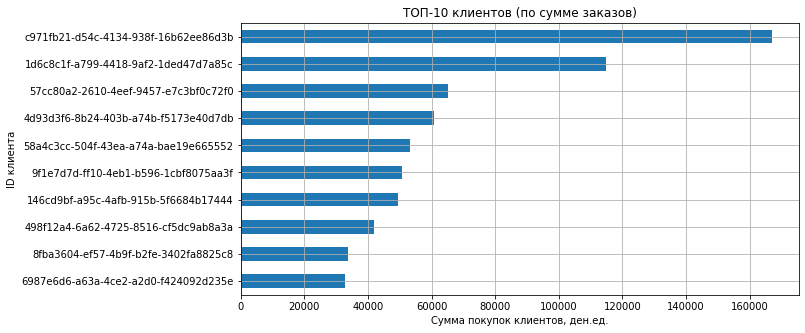

In [33]:
#топ-10 клиентов
top_customer =customer_total.head(10)
top_customer['total'].sort_values(ascending= True).plot(kind="barh",grid=True,figsize = (10,5), title = "ТОП-10 клиентов (по сумме заказов)")
plt.xlabel('Сумма покупок клиентов, ден.ед.', fontsize=10) # добавляем подпись к оси абцисс "ось х"
plt.ylabel('ID клиента', fontsize=10) # добавляем подпись к оси ординат "ось y"
plt.show()

**Вывод:** у нас есть 2 клиента, которые значительно выделяются по суммам заказов, остальные клиенты - значительно отстают.

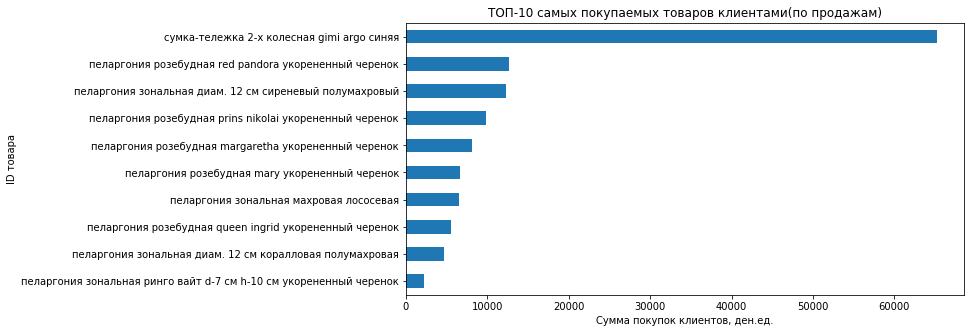

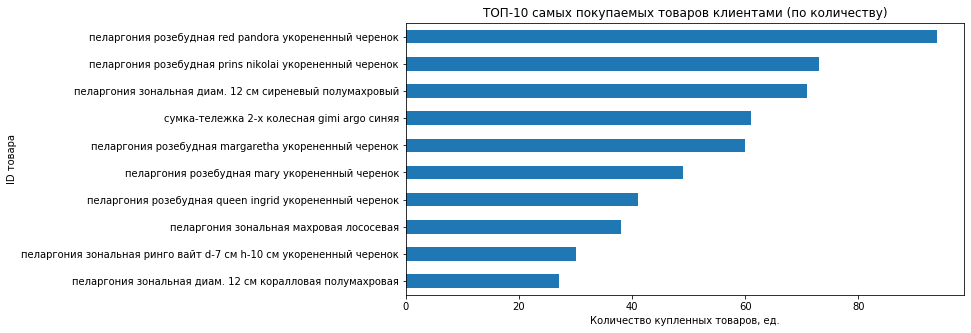

In [34]:
#посмотрим теперь на самые покупаемые товары в денежном и штучном эквиваленте
item = data_general.pivot_table(index = 'product', 
                             aggfunc ={'customer_id':'nunique', 'quantity':'sum',
                                       'total':'sum'})
item.rename(columns={'customer_id':'unique_users'}, inplace=True)
top_item = item.sort_values(by= 'unique_users', ascending = False).head(10)
top_item['total'].sort_values(ascending= True).plot(kind="barh", figsize = (10,5), title = "ТОП-10 самых покупаемых товаров клиентами(по продажам)")
plt.xlabel('Сумма покупок клиентов, ден.ед.', fontsize=10) # добавляем подпись к оси абцисс "ось х"
plt.ylabel('ID товара', fontsize=10) # добавляем подпись к оси ординат "ось y"
plt.show()
plt.show()

top_item['quantity'].sort_values(ascending= True).plot(kind="barh", figsize = (10,5), title = "ТОП-10 самых покупаемых товаров клиентами (по количеству)")
plt.xlabel('Количество купленных товаров, ед.', fontsize=10) # добавляем подпись к оси абцисс "ось х"
plt.ylabel('ID товара', fontsize=10) # добавляем подпись к оси ординат "ось y"
plt.show()
plt.show()

**Вывод:** как мы видим, по количеству и в денежном выражении в числе лидеров - пеларгонии разных сортов. Но в денежном выражении значительно лидирует сумка-тележка (категория "хозтовары").

Мы понимаем, что октябрь дважды попадает в выборку, поэтому для более полной картины мы будем также смотреть более подробно по месяцам, дням недели и пр.

Для рисования графиков была использована различная цветовая палитра, которую нашла на сайте: https://undoshutdown.blogspot.com/2018/06/matplotlib-python.html

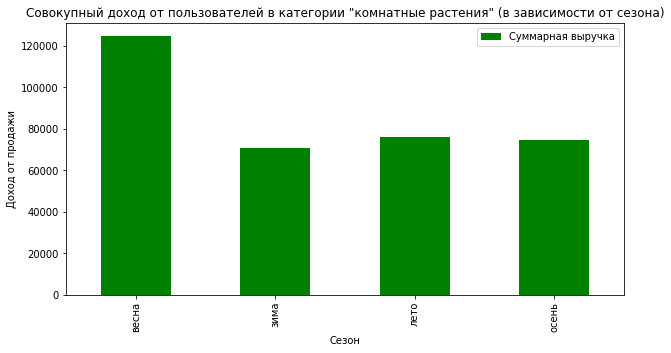

In [35]:
flowers_season = data_general.query('category == "комнатные растения"')
flowers_season.groupby(['season']).agg({'total': 'sum'}).plot(kind='bar', color = 'green', title = 'Совокупный доход от пользователей в категории "комнатные растения" (в зависимости от сезона)', figsize = (10,5))
plt.xlabel('Сезон', fontsize=10) # "ось х"
plt.ylabel('Доход от продажи', fontsize=10) # "ось y"
plt.legend(['Суммарная выручка']); # Подпись легенды 

**Вывод:** Как мы видим, для категории "комнатные растения" пик продаж приходится на весну. Это можно объяснить тем, что это более благоприятный период для роста растений, пересадки. В остальные времена года мы видим примерно похожие продажи.

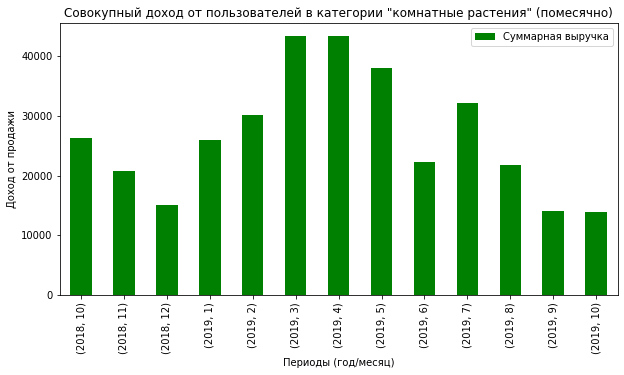

In [36]:
flowers_month = data_general.query('category == "комнатные растения"')
flowers_month.groupby(['year', 'month']).agg({'total': 'sum'}).plot(
    kind='bar', color = 'green', title = 'Совокупный доход от пользователей в категории "комнатные растения" (помесячно)', figsize = (10,5))
plt.xlabel('Периоды (год/месяц)', fontsize=10) # "ось х"
plt.ylabel('Доход от продажи', fontsize=10) # "ось y"
plt.legend(['Суммарная выручка']); # Подпись легенды 

**Вывод:** мы видим, что март и апрель лидируют по выручке от продажи комнатных растений по причинам, описанным ранее. По сравнению с 2018 г., в октябре 2019 г. наблюдается спад продаж, что является негативной тенденцией.

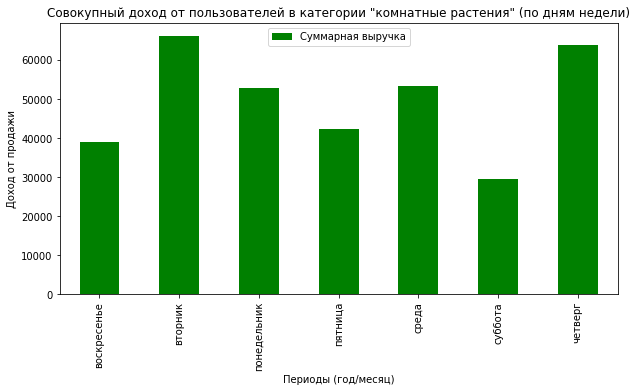

In [37]:
flowers_day = data_general.query('category == "комнатные растения"')
flowers_day.groupby(['day_name']).agg({'total': 'sum'}).plot(
    kind='bar', color = 'green', title = 'Совокупный доход от пользователей в категории "комнатные растения" (по дням недели)', figsize = (10,5))
plt.xlabel('Периоды (год/месяц)', fontsize=10) # "ось х"
plt.ylabel('Доход от продажи', fontsize=10) # "ось y"
plt.legend(['Суммарная выручка']); # Подпись легенды 

---

<div class="alert alert-block alert-warning">
    

## Комментарий от наставника

Здесь конечно лучше отсортировать дни недели по порядку, а не алфавиту.
</div>

---

**Вывод:** Мы видим, что во вторник и четверг чаще всего покупают комнатные растения. Интересная взаимосвязь, которую мы можем учитывать при подготовке email-рассылки.

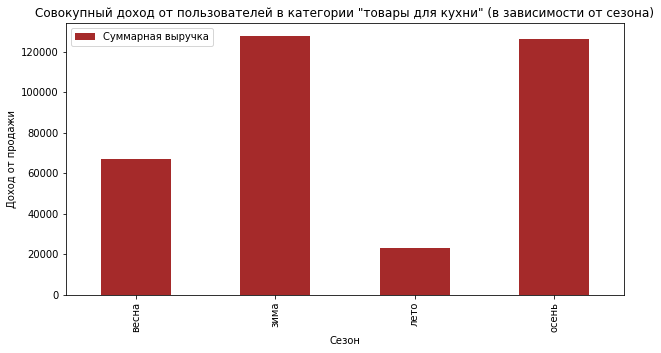

In [38]:
kitchen_season = data_general.query('category == "товары для кухни"')
kitchen_season.groupby(['season']).agg({'total': 'sum'}).plot(
    kind='bar', color = 'brown', title = 'Совокупный доход от пользователей в категории "товары для кухни" (в зависимости от сезона)', figsize = (10,5))
plt.xlabel('Сезон', fontsize=10) # "ось х"
plt.ylabel('Доход от продажи', fontsize=10) # "ось y"
plt.legend(['Суммарная выручка']); # Подпись легенды 

**Вывод:** обновлением товаров для кухни, как правило, занимаются в осенне-зимний период. Это можно объяснить тем, что в другой период, как правило, заняты заботами, связанными с садом-огородом. Также зимний период связан с различными праздниками, наборы посуды являются хорошим подарком для родных и и близких людей.

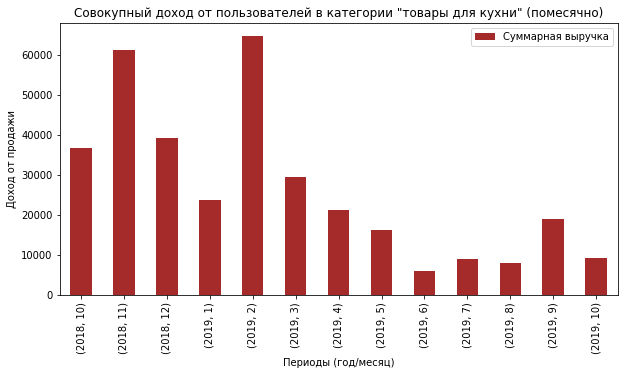

In [39]:
kitchen_month = data_general.query('category == "товары для кухни"')
kitchen_month.groupby(['year', 'month']).agg({'total': 'sum'}).plot(
    kind='bar', color = 'brown', title = 'Совокупный доход от пользователей в категории "товары для кухни" (помесячно)', figsize = (10,5))
plt.xlabel('Периоды (год/месяц)', fontsize=10) # "ось х"
plt.ylabel('Доход от продажи', fontsize=10) # "ось y"
plt.legend(['Суммарная выручка']); # Подпись легенды 

**Вывод:** мы видим, что прибыльными месяцами для категории "товары для кухни" являются ноябрь и февраль - это как раз период подготовки к различным праздникам. В свою очередь летние месяца (июнь особенно) являются провальными месяцами в данной категории. Также видим спад продаж в октябре по сравнению с предыдущим годом. 

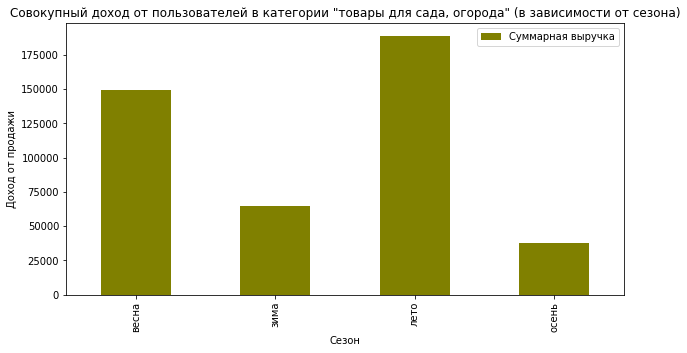

In [40]:
garden_season = data_general.query('category == "товары для сада, огорода"')
garden_season.groupby(['season']).agg({'total': 'sum'}).plot(
    kind='bar', color = 'olive', title = 'Совокупный доход от пользователей в категории "товары для сада, огорода" (в зависимости от сезона)', figsize = (10,5))
plt.xlabel('Сезон', fontsize=10) # "ось х"
plt.ylabel('Доход от продажи', fontsize=10) # "ось y"
plt.legend(['Суммарная выручка']); # Подпись легенды 

**Вывод:** закономерно, что для категории "товары для сада, огорода" прибыльным сезоном является лето, за ним следует весенний период.

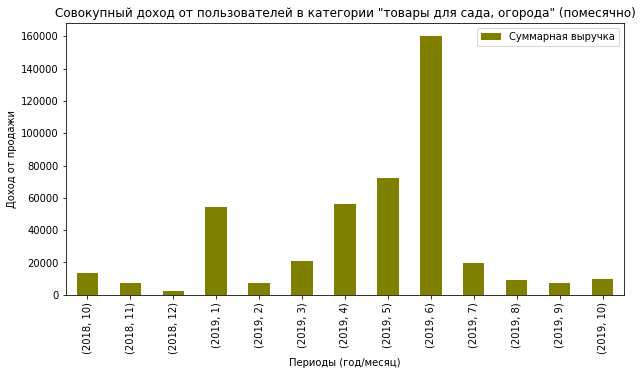

In [41]:
garden_month = data_general.query('category == "товары для сада, огорода"')
garden_month.groupby(['year', 'month']).agg({'total': 'sum'}).plot(
    kind='bar', color = 'olive', title = 'Совокупный доход от пользователей в категории "товары для сада, огорода" (помесячно)', figsize = (10,5))
plt.xlabel('Периоды (год/месяц)', fontsize=10) # "ось х"
plt.ylabel('Доход от продажи', fontsize=10) # "ось y"
plt.legend(['Суммарная выручка']); # Подпись легенды 

**Вывод:** очевидно, что в июне покупатели закупаются семенами и рассадой, начинается активная садово-огородная работа. Также хотела бы обратить внимание на январь - в этом месяце также наблюдается рост, т.к. садоводы планируют садовые работы и готовят рассаду.

---
<div class="alert alert-block alert-success">

## Комментарий от наставника

Хорошая цепочка выводов. Конечно здесь могут накладываться какие-нибудь рекламные активности магазина (мало ли они проводили акции). Но в нашем случае это никак не выяснить.
</div>

---

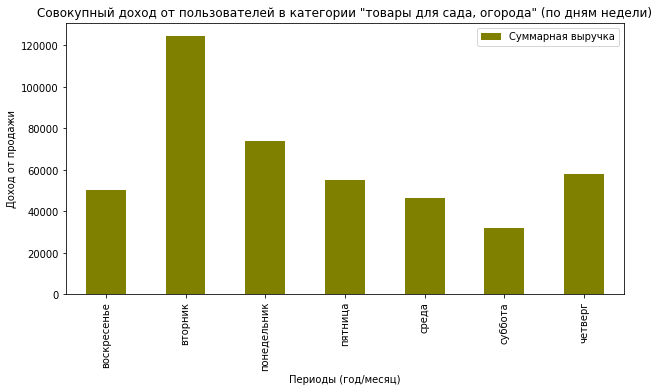

In [42]:
garden_day = data_general.query('category == "товары для сада, огорода"')
garden_day.groupby(['day_name']).agg({'total': 'sum'}).plot(
    kind='bar', color = 'olive', title = 'Совокупный доход от пользователей в категории "товары для сада, огорода" (по дням недели)', figsize = (10,5))
plt.xlabel('Периоды (год/месяц)', fontsize=10) # "ось х"
plt.ylabel('Доход от продажи', fontsize=10) # "ось y"
plt.legend(['Суммарная выручка']); # Подпись легенды 

**Вывод:** также важно посмотреть, в какой день недели больше совершается заказов - и снова мы видим, что это вторник. Вся эта информация необходима для рассылки.

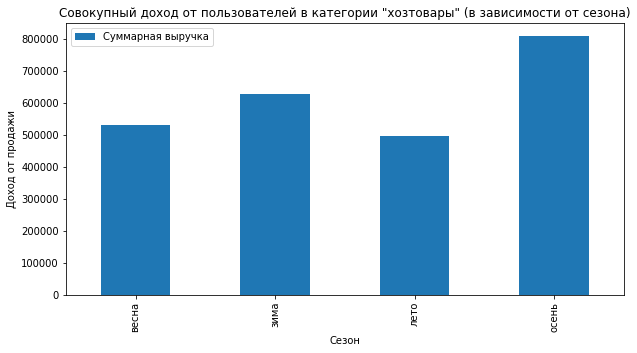

In [43]:
household_season = data_general.query('category == "хозтовары"')
household_season.groupby(['season']).agg({'total': 'sum'}).plot(
    kind='bar', title = 'Совокупный доход от пользователей в категории "хозтовары" (в зависимости от сезона)', figsize = (10,5))
plt.xlabel('Сезон', fontsize=10) # "ось х"
plt.ylabel('Доход от продажи', fontsize=10) # "ось y"
plt.legend(['Суммарная выручка']); # Подпись легенды 

**Вывод:** после садово-огородного сезона клиенты предпочитают заняться домашними делами, в связи с этим возрастает количество заказов в категории "хозтовары"

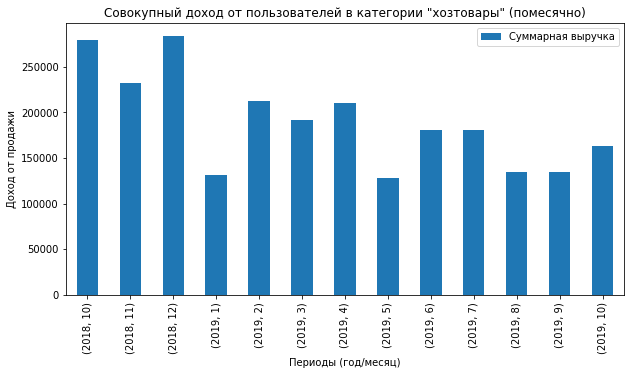

In [44]:
household_month = data_general.query('category == "хозтовары"')
household_month.groupby(['year', 'month']).agg({'total': 'sum'}).plot(
    kind='bar', title = 'Совокупный доход от пользователей в категории "хозтовары" (помесячно)', figsize = (10,5))
plt.xlabel('Периоды (год/месяц)', fontsize=10) # "ось х"
plt.ylabel('Доход от продажи', fontsize=10) # "ось y"
plt.legend(['Суммарная выручка']); # Подпись легенды 

**Вывод:** декабрь и октябрь - наиболее прибыльные месяцы для категории "хозтовары". Важно заметить, что в октябре 2019 г также наблюдается спад продаж по сравнению с предыдущим годом.

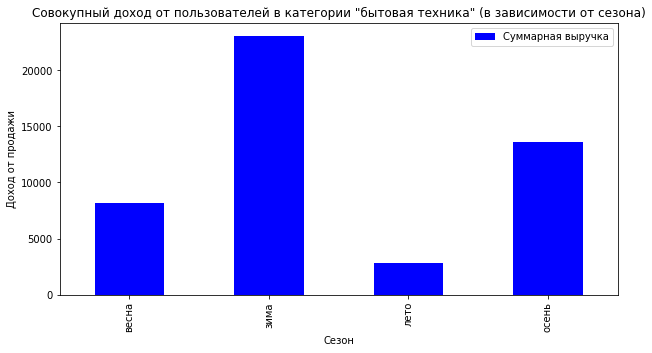

In [45]:
appliances_season = data_general.query('category == "бытовая техника"')
appliances_season.groupby(['season']).agg({'total': 'sum'}).plot(
    kind='bar', color = 'blue', title = 'Совокупный доход от пользователей в категории "бытовая техника" (в зависимости от сезона)', figsize = (10,5))
plt.xlabel('Сезон', fontsize=10) # "ось х"
plt.ylabel('Доход от продажи', fontsize=10) # "ось y"
plt.legend(['Суммарная выручка']); # Подпись легенды 

**Вывод:** в зимний период совершается наибольшее количество покупок бытовой техники. Это можно объяснить новогодними праздниками.

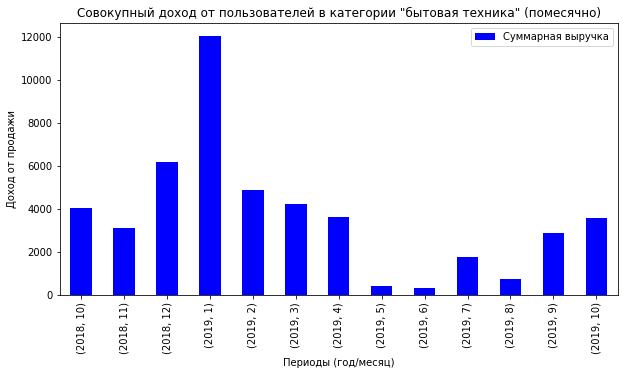

In [46]:
appliances_month = data_general.query('category == "бытовая техника"')
appliances_month.groupby(['year', 'month']).agg({'total': 'sum'}).plot(
    kind='bar', color = 'blue', title = 'Совокупный доход от пользователей в категории "бытовая техника" (помесячно)', figsize = (10,5))
plt.xlabel('Периоды (год/месяц)', fontsize=10) # "ось х"
plt.ylabel('Доход от продажи', fontsize=10) # "ось y"
plt.legend(['Суммарная выручка']); # Подпись легенды 

**Вывод:** закономерно, что на январь приходится больше всего покупок бытовой техники - покупаются подарки на подаренные деньги, обналичиваются сертификаты.

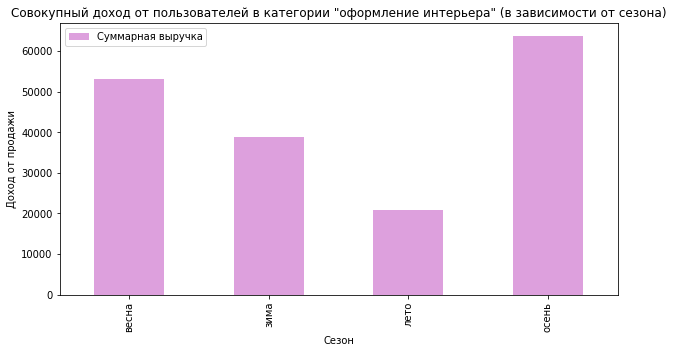

In [47]:
interior_season = data_general.query('category == "оформление интерьера"')
interior_season.groupby(['season']).agg({'total': 'sum'}).plot(
    kind='bar', color = 'plum', title = 'Совокупный доход от пользователей в категории "оформление интерьера" (в зависимости от сезона)', figsize = (10,5))
plt.xlabel('Сезон', fontsize=10) # "ось х"
plt.ylabel('Доход от продажи', fontsize=10) # "ось y"
plt.legend(['Суммарная выручка']); # Подпись легенды 

**Вывод:** мы видим, что товары для интерьера больше всего покупаются в весенне-осенний период.

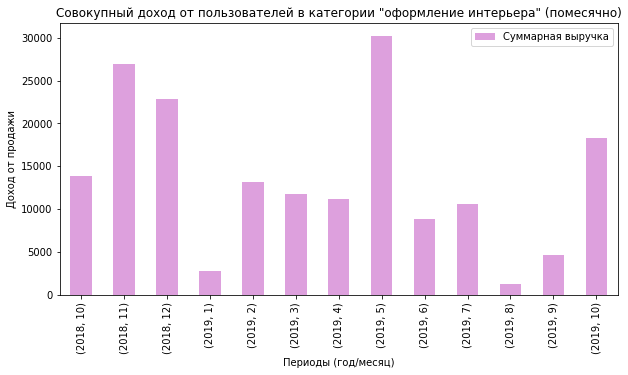

In [48]:
interior_month = data_general.query('category == "оформление интерьера"')
interior_month.groupby(['year', 'month']).agg({'total': 'sum'}).plot(
    kind='bar', color = 'plum', title = 'Совокупный доход от пользователей в категории "оформление интерьера" (помесячно)', figsize = (10,5))
plt.xlabel('Периоды (год/месяц)', fontsize=10) # "ось х"
plt.ylabel('Доход от продажи', fontsize=10) # "ось y"
plt.legend(['Суммарная выручка']); # Подпись легенды 

**Вывод:** мы видим, что большая часть покупок приходится на май (скорее всего муляжи овощей, фруктов), а также на ноябрь, когда готовятся к оформлению квартиры к Новому году. Важно отметить, что в октябре 2019 г наблюдается рост продаж по сравнению с предыдущим годом, что безусловно является положительной тенденицей, надо данное направление развивать.

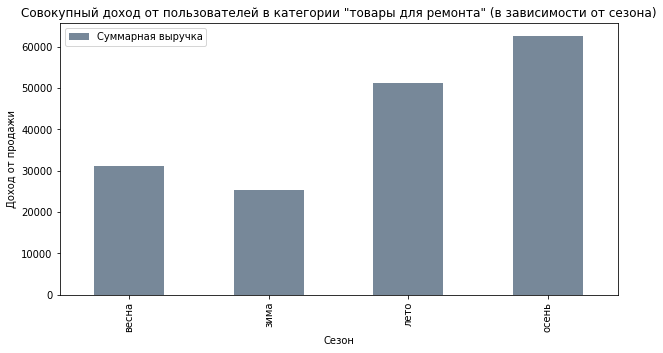

In [49]:
repairs_season = data_general.query('category == "товары для ремонта"')
repairs_season.groupby(['season']).agg({'total': 'sum'}).plot(
    kind='bar', color = 'lightslategrey', title = 'Совокупный доход от пользователей в категории "товары для ремонта" (в зависимости от сезона)', figsize = (10,5))
plt.xlabel('Сезон', fontsize=10) # "ось х"
plt.ylabel('Доход от продажи', fontsize=10) # "ось y"
plt.legend(['Суммарная выручка']); # Подпись легенды 

**Вывод:**  в осенний период наблюдается рост продаж товаров для ремонта - заканчивается садово-огородный период и народ приступает к ремонту своих квартир.

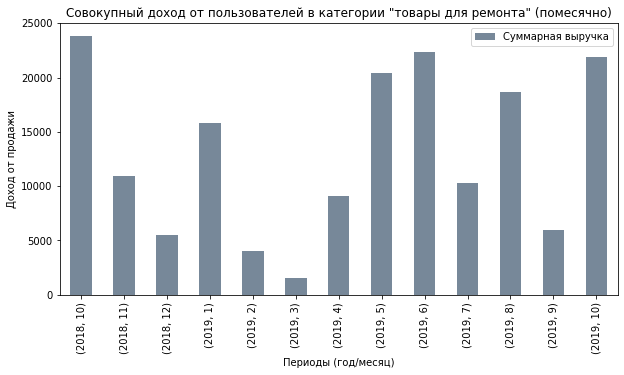

In [50]:
repairs_month = data_general.query('category == "товары для ремонта"')
repairs_month.groupby(['year', 'month']).agg({'total': 'sum'}).plot(
    kind='bar', color = 'lightslategrey', title = 'Совокупный доход от пользователей в категории "товары для ремонта" (помесячно)', figsize = (10,5))
plt.xlabel('Периоды (год/месяц)', fontsize=10) # "ось х"
plt.ylabel('Доход от продажи', fontsize=10) # "ось y"
plt.legend(['Суммарная выручка']); # Подпись легенды 

**Вывод:** Октябрь - один из самых пиковых месяцев для категории "товы для ремонта", в свою очередь, в марте - клиенты, как правило, заняты другими вопросами.

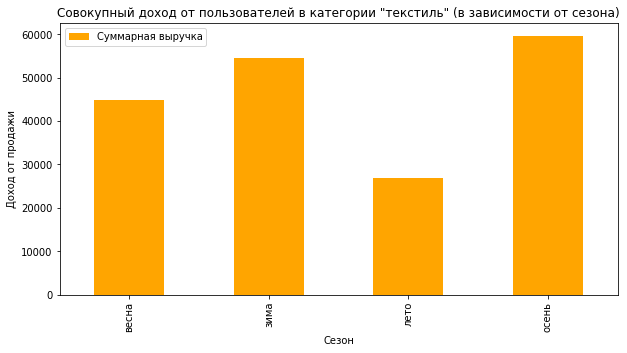

In [51]:
textils_season = data_general.query('category == "текстиль"')
textils_season.groupby(['season']).agg({'total': 'sum'}).plot(
    kind='bar', color = 'orange', title = 'Совокупный доход от пользователей в категории "текстиль" (в зависимости от сезона)', figsize = (10,5))
plt.xlabel('Сезон', fontsize=10) # "ось х"
plt.ylabel('Доход от продажи', fontsize=10) # "ось y"
plt.legend(['Суммарная выручка']); # Подпись легенды 

**Вывод:** мы видим, что в целом к данной категории есть интерес на протяжении года, за исключением летнего периода.

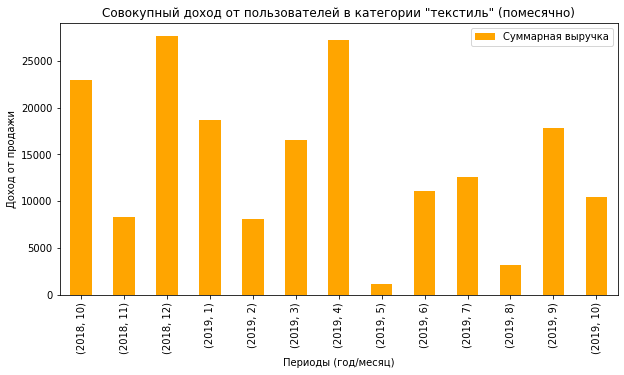

In [52]:
textils_month = data_general.query('category == "текстиль"')
textils_month.groupby(['year', 'month']).agg({'total': 'sum'}).plot(
    kind='bar', color = 'orange', title = 'Совокупный доход от пользователей в категории "текстиль" (помесячно)', figsize = (10,5))
plt.xlabel('Периоды (год/месяц)', fontsize=10) # "ось х"
plt.ylabel('Доход от продажи', fontsize=10) # "ось y"
plt.legend(['Суммарная выручка']); # Подпись легенды 

**Вывод:** мы видим пик продаж приходится на декабрь и апрель, как раз это период, когда готовятся к праздникам и проводят субботники. Мы также видим спад в октябре 2019 г., по сравнению с октябрем 2018г., что важно взять под контроль. Важно отметить, что в октябре 2019 г наблюдается значительный спад по сравнению с прошлым годом.

In [69]:
#посмотрим распределение вырчуки по категориям
category_total = data_new.pivot_table(index = ['category'], values = 'total', aggfunc = sum)
category_total

,total
category,
бытовая техника,47666.0
комнатные растения,346851.0
оформление интерьера,176378.0
текстиль,185893.0
товары для кухни,343941.0
товары для ремонта,170282.0
"товары для сада, огорода",440240.0
хозтовары,2465029.0


**Вывод:** Мы видим, что наиболее прибыльной считается категория "хозтовары" (мы также помним про вантузы, которые мы исключили из исследования), а также категории "товары для сада, огорода", "комнатные растения", остальные категории значительно отстают, поэтому их можно отнести к неосновному ассортименту.

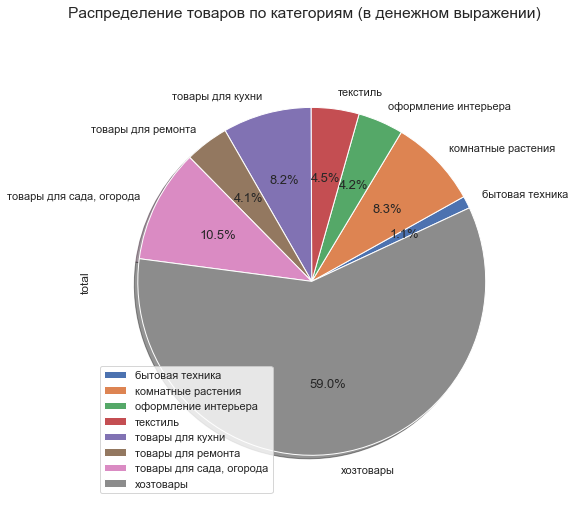

In [78]:
#найдем процентное соотношение каждой категории в общей доли продажи
category_total.plot.pie(subplots=True, figsize=(8, 8), shadow = True, title = "Распределение товаров по категориям (в денежном выражении)", autopct='%1.1f%%', startangle=25)
plt.show()

**Вывод:** Лидером в общей доли продаж занимает категория "хозтовары" (59%), т.е. чаще всего к нам приходя за различными тележками, стремянками и пр. 

In [71]:
#распределение каждой категории по количеству
quantity_total = data_new.pivot_table(index = ['category'], values = 'quantity', aggfunc = sum)
quantity_total.head(10)

,quantity
category,
бытовая техника,71
комнатные растения,2003
оформление интерьера,2722
текстиль,178
товары для кухни,1900
товары для ремонта,606
"товары для сада, огорода",3284
хозтовары,5089


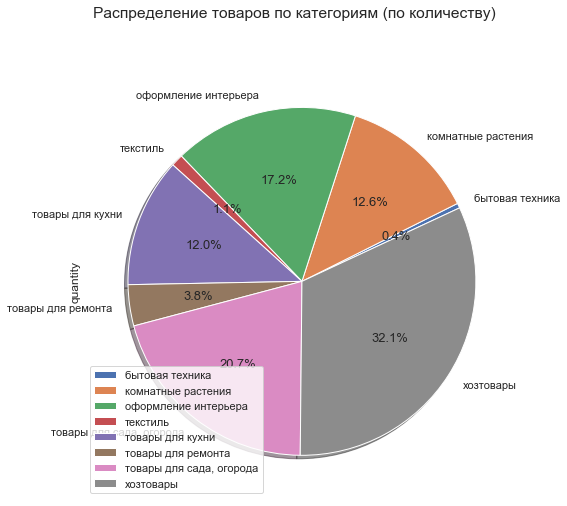

In [77]:
quantity_total.plot.pie(subplots=True, figsize=(8, 8), shadow = True, title = "Распределение товаров по категориям (по количеству)", autopct='%1.1f%%', startangle=25)
plt.show()

**Вывод:** в данном случае распределение по количеству выглядит немного иначе: лидером также является категория "хозтовары" (32,1%), затем - товары для сада и огорода (20,7%), на третьем месте - оформление интерьера.

In [242]:
dau = data_general.groupby('date_day').agg({'unique': 'nunique'}).mean()
print('Количество уникальных пользователей в день:', int(dau), 'человек')

Количество уникальных пользователей в день: 8 человек


In [243]:
wau = data_general.groupby(['year','week']).agg({'unique': 'nunique'}).mean()
print('Количество уникальных пользователей в неделю:', int(wau), 'человек')

Количество уникальных пользователей в неделю: 59 человек


In [244]:
mau = data_general.groupby(['year','month']).agg({'unique': 'nunique'}).mean()
print('Количество уникальных пользователей в месяц:', int(mau), 'человек')

Количество уникальных пользователей в месяц: 262 человек


**Выводы: По итогам проведенного анализа мы выяснили, что категория "хозтовары" - это самая прибыльная категория. В целом почти по всем категориям наблюдается спад продаж по сравнению с предыдущим годом (октябрь 2018-2019 гг.). Для некоторых категорий товаров наблюдается сезонность, которую нужно учитывать при разработке программ лояльности, рассылки по почте (например, товары для сада, огорода, комнатные растения и пр.)**

<div class="alert alert-info" role="alert"> 

## 3. Сегментация пользователей на основе истории их покупок <a class="anchor" id="segment"></a> 
</div>

Проведем когортный анализ для наших клиентов. Для этого нам нужны уникальные номера заказов, получим их следующим образом:

In [33]:
data_general['unique'] = data_general['order_id'] + data_general['date']
data_general.head()

,date,customer_id,order_id,product,quantity,price,total,category,day,week,month,year,date_day,season,day_name,unique
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,142.0,комнатные растения,1,40,10,2018,2018-10-01,осень,понедельник,2018-10-01 00:00:00.000068477
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,194.0,комнатные растения,1,40,10,2018,2018-10-01,осень,понедельник,2018-10-01 00:00:00.000068477
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,112.0,комнатные растения,1,40,10,2018,2018-10-01,осень,понедельник,2018-10-01 00:00:00.000068477
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,179.0,комнатные растения,1,40,10,2018,2018-10-01,осень,понедельник,2018-10-01 00:00:00.000068477
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,112.0,комнатные растения,1,40,10,2018,2018-10-01,осень,понедельник,2018-10-01 00:00:00.000068477


In [34]:
ky1 = data_general.groupby('category')['unique'].nunique()
ky1.sort_values(ascending = False)

category
хозтовары                   1645
комнатные растения           659
товары для сада, огорода     408
товары для кухни             356
оформление интерьера         264
текстиль                     114
товары для ремонта            94
бытовая техника               63
Name: unique, dtype: int64

**Проведем сначала когортный анализ по всей выборке**

In [35]:
#Сгруппируем данные по столбцу 'customer_id' методом groupby(). Для каждого клиента получим месяц его первого заказа
first_order_date_by_customers = data_general.groupby(['customer_id'])['date'].min() 
print (first_order_date_by_customers.head())

customer_id
000d6849-084e-4d9f-ac03-37174eaf60c4   2019-10-16 08:00:00
001cee7f-0b29-4716-b202-0042213ab038   2019-02-16 11:00:00
00299f34-5385-4d13-9aea-c80b81658e1b   2019-10-14 23:00:00
002d4d3a-4a59-406b-86ec-c3314357e498   2019-01-27 17:00:00
003bbd39-0000-41ff-b7f9-2ddaec152037   2019-09-29 17:00:00
Name: date, dtype: datetime64[ns]


In [36]:
first_order_date_by_customers.name = 'first_order_date'

In [37]:
orders = data_general.join(first_order_date_by_customers,on='customer_id')
print(orders.head())

        date                           customer_id  order_id  \
0 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
1 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
2 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
3 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
4 2018-10-01  ee47d746-6d2f-4d3c-9622-c31412542920     68477   

                                             product  quantity  price  total  \
0    комнатное растение в горшке алое вера, d12, h30         1  142.0  142.0   
1  комнатное растение в горшке кофе арабика, d12,...         1  194.0  194.0   
2                        радермахера d-12 см h-20 см         1  112.0  112.0   
3                   хризолидокарпус лутесценс d-9 см         1  179.0  179.0   
4                     циперус зумула d-12 см h-25 см         1  112.0  112.0   

             category  day  week  month  year    date_day season     day_name  \
0  комнатные растения    1    40     10  2018  2018-1

In [38]:
#укоротим дату до месяца
orders['first_order_month'] = orders['first_order_date'].astype('datetime64[M]')
orders['order_month'] = orders['date'].astype('datetime64[M]')

In [39]:
#Теперь для каждой строки датафрейма можно рассчитать lifetime пользователя в рамках когорты
orders['cohort_lifetime'] = (orders['order_month'] - orders['first_order_month'])
# еще сильнее укоротим дату и переведем в строковый формат
orders['first_order_month'] = orders['first_order_month'].dt.strftime('%Y-%m')
orders['order_month'] = orders['order_month'].dt.strftime('%Y-%m')
#уберем из когорты "дату" и получим целочисленное значение путем округления
try:
    orders['cohort_lifetime'] = orders['cohort_lifetime'] / np.timedelta64(1,'M')    
except:
    print('Что-то пошло не так, не удается выполнить операцию!')

orders['cohort_lifetime'] = orders['cohort_lifetime'].round().astype('int')
orders.head()

,date,customer_id,order_id,product,quantity,price,total,category,day,week,month,year,date_day,season,day_name,unique,first_order_date,first_order_month,order_month,cohort_lifetime
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,142.0,комнатные растения,1,40,10,2018,2018-10-01,осень,понедельник,2018-10-01 00:00:00.000068477,2018-10-01,2018-10,2018-10,0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,194.0,комнатные растения,1,40,10,2018,2018-10-01,осень,понедельник,2018-10-01 00:00:00.000068477,2018-10-01,2018-10,2018-10,0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,112.0,комнатные растения,1,40,10,2018,2018-10-01,осень,понедельник,2018-10-01 00:00:00.000068477,2018-10-01,2018-10,2018-10,0
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,179.0,комнатные растения,1,40,10,2018,2018-10-01,осень,понедельник,2018-10-01 00:00:00.000068477,2018-10-01,2018-10,2018-10,0
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,112.0,комнатные растения,1,40,10,2018,2018-10-01,осень,понедельник,2018-10-01 00:00:00.000068477,2018-10-01,2018-10,2018-10,0


In [40]:
#Сгруппируем данные по когорте и lifetime
#Посчитаем для каждой когорты количество активных пользователей на определённый «месяц жизни»:
cohorts = orders.groupby(['first_order_month','cohort_lifetime']).agg({'unique':'nunique', 'total': 'sum'}).reset_index()
cohorts.head()

,first_order_month,cohort_lifetime,unique,total
0,2018-10,0,259,420754.0
1,2018-10,1,24,27717.0
2,2018-10,2,44,44097.0
3,2018-10,3,8,9449.0
4,2018-10,4,29,52286.0


In [41]:
#Чтобы найти Retention Rate, нужно сперва получить число пользователей, изначально бывших в когорте, 
#и на него разделить число пользователей в каждый следующий неделю.
#Найдём исходное количество пользователей в когорте. Возьмём их число на нулевую неделю
inital_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_order_month','unique']]
inital_users_count

,first_order_month,unique
0,2018-10,259
6,2018-11,199
9,2018-12,309
12,2019-01,181
16,2019-02,300
19,2019-03,287
23,2019-04,305
30,2019-05,215
34,2019-06,183
36,2019-07,229


In [42]:
#Переименуем столбец `uid` в `cohort_users`
inital_users_count = inital_users_count.rename(columns={'unique':'cohort_users'})

In [43]:
#Объединим данные по когортам с исходным количеством пользователей в когорте:
cohorts= cohorts.merge(inital_users_count,on='first_order_month')

In [44]:
#Наконец, рассчитаем Retention Rate. 
#Разделим количество активных пользователей в каждый из месяцев на исходное число пользователей в когорте:
cohorts['retention'] = cohorts['unique']/cohorts['cohort_users']

In [45]:
#Построим сводную таблицу и создадим тепловую карту
retention_pivot = cohorts.pivot_table(index='first_order_month',columns='cohort_lifetime',values='retention',aggfunc='sum')

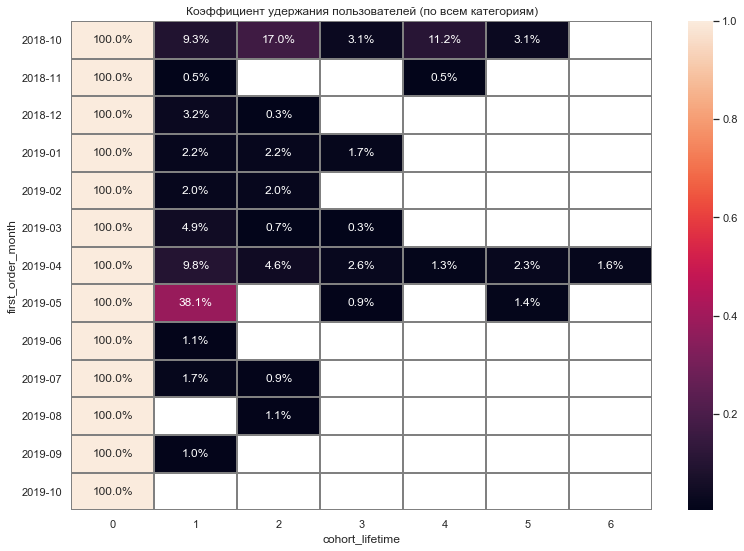

In [46]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Коэффициент удержания пользователей (по всем категориям)')

sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray')

plt.show()

**Вывод:** срок жизни всех когорт составляет - 6 месяцев, что является не самой лучшей ситуацией. Инами словами, клиенты долго не сотрудничают с интернет-магазином. 

Для того, чтобы убедиться в том, что сегменты имеют различия посмотрим на общую сумму заказов и средний чек по каждой когорте.

In [47]:
cohorts_check = orders.groupby(['first_order_month']).agg({'unique':'count', 'total': 'sum'}).reset_index()
cohorts_check.head()

,first_order_month,unique,total
0,2018-10,700,562984.0
1,2018-11,432,343917.0
2,2018-12,347,383115.0
3,2019-01,228,273858.0
4,2019-02,409,293119.0


In [48]:
cohorts_check['check'] = cohorts_check['total'] / cohorts_check['unique']
cohorts_check

,first_order_month,unique,total,check
0,2018-10,700,562984.0,804.262857
1,2018-11,432,343917.0,796.104167
2,2018-12,347,383115.0,1104.077810
3,2019-01,228,273858.0,1201.131579
4,2019-02,409,293119.0,716.672372
5,2019-03,535,310019.0,579.474766
6,2019-04,785,462649.0,589.361783
7,2019-05,1883,387867.0,205.983537
8,2019-06,325,256410.0,788.953846
9,2019-07,391,278079.0,711.199488


Мы видим, что, например, в майской когорте самый низкий средний чек, а в январской когорте, наоборот, - самый высокий.

Проверим статистическую разницу между получившимися сегментами.

In [49]:
alpha = .05 # критический уровень статистической значимости

results = stats.mannwhitneyu(cohorts_check[cohorts_check['first_order_month']=='2018-10']['check'], cohorts_check[cohorts_check['first_order_month']=='2019-08']['check'])[1]

print('p-value:', results)

if (results < alpha):
    print('Отвергаем нулевую гипотезу. Средний чек когорты 2018-10 отличается от среднего чека когорты 2019-08')
else:
    print('Не получилось отвергнуть нулевую гипотезу. Средний чек когорты 2018-10 не отличается от среднего чека когорты 2019-08')

p-value: 0.5
Не получилось отвергнуть нулевую гипотезу. Средний чек когорты 2018-10 не отличается от среднего чека когорты 2019-08


Как мы видим, мы получили статистически одинаковые группы, в связи с этим использовать данную сегментацию мы не можем.

**Рассмотрим еще одну сегментацию: в зависимости от недели, когда совершался заказ.**

In [50]:
clusters = data_general.pivot_table(index = 'week', aggfunc = {'unique': 'nunique', 'quantity': 'sum', 'total': 'sum'})
clusters.head()

,quantity,total,unique
week,,,
1,65,43963.0,27
2,179,59105.0,44
3,118,79766.0,42
4,282,58108.0,53
5,101,59548.0,50


In [51]:
# создаём объект класса scaler (нормализатор)
scaler = StandardScaler() 
# обучаем нормализатор и преобразуем набор данных
x_sc = scaler.fit_transform(clusters)

In [52]:
linked = linkage(x_sc, method = 'ward')

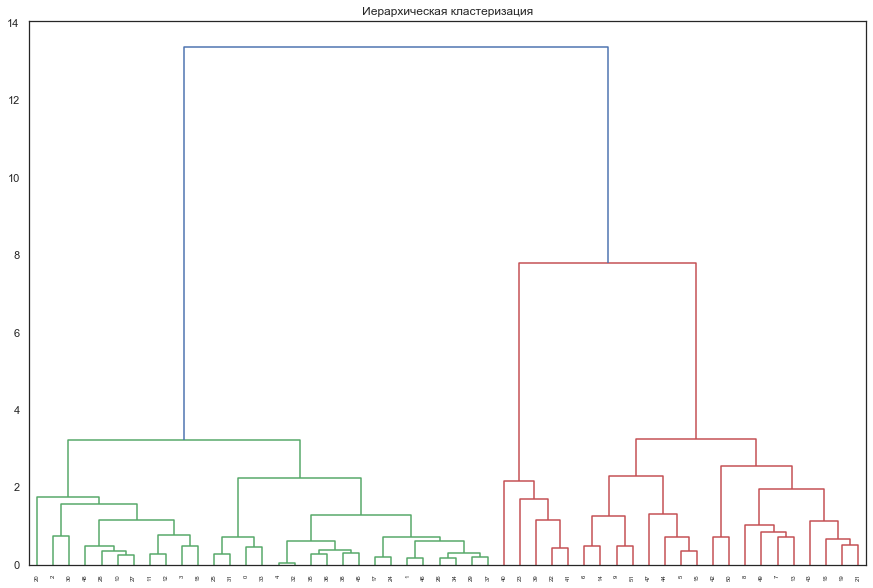

In [53]:
#построим дендограмму
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация')
plt.show()

Мы отчетливо видим 2 кластера. Используем модель k-means

In [54]:
# задаём модель k_means с числом кластеров 2
km = KMeans(n_clusters = 2)

# прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 1)
labels = km.fit_predict(x_sc)

# сохраняем метки кластера в поле нашего датасета
clusters['cluster_km'] = labels

In [55]:
cluster_km_mean = clusters.groupby(['cluster_km']).mean()
cluster_km_mean.T

cluster_km,0,1
quantity,186.03125,495.00
total,56414.09375,118551.45
unique,50.34375,90.30


In [56]:
clusters['check'] = clusters['total'] / clusters['unique']
clusters.head()

,quantity,total,unique,cluster_km,check
week,,,,,
1,65,43963.0,27,0,1628.259259
2,179,59105.0,44,0,1343.295455
3,118,79766.0,42,0,1899.190476
4,282,58108.0,53,0,1096.377358
5,101,59548.0,50,0,1190.960000


In [82]:
#проверим статистическое различие групп
alpha = .05 # критический уровень статистической значимости

results_2 = stats.mannwhitneyu(clusters[clusters['cluster_km']=='0']['total'], clusters[clusters['cluster_km']=='1']['total'])[1]

print('p-value:', "{0:.3f}".format(results_2))

if (results_2 < alpha):
    print('Отвергаем нулевую гипотезу. Выручка 0-го кластера отличается от выручки 1-го кластера')
else:
    print('Не получилось отвергнуть нулевую гипотезу. Выручка 0-го кластера не отличается от выручки 1-го кластера')

p-value: 0.000
Отвергаем нулевую гипотезу. Выручка 0-го кластера отличается от выручки 1-го кластера


Более подробно ознакомилась с критерием Манна-Уитни: https://medstatistic.ru/theory/mann.html

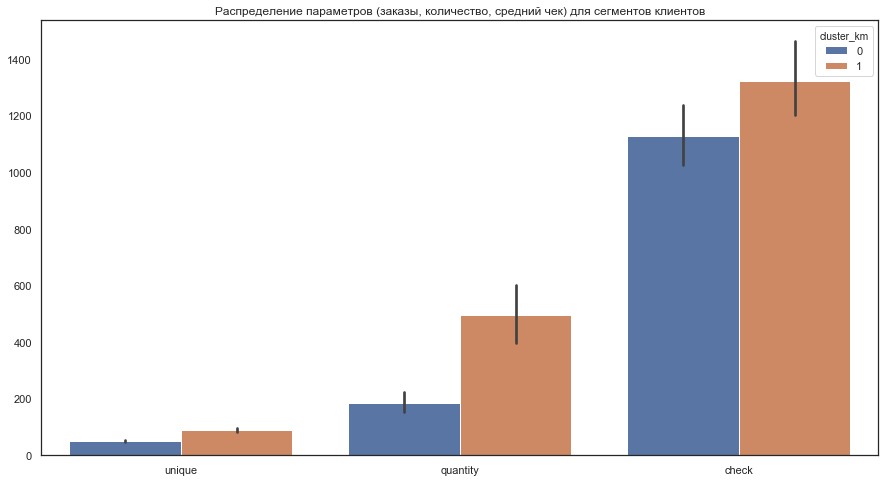

In [81]:
#построим на распределения признаков
melted = pd.melt(clusters, id_vars = ['cluster_km'], value_vars = ['unique', 'quantity', 'check'])
plt.rcParams.update({'font.size': 13})
plt.figure(figsize = (15,8))
ax = sns.barplot(x= 'variable' , y='value',  hue = 'cluster_km', data = melted)
plt.title('Распределение параметров (заказы, количество, средний чек) для сегментов клиентов')
plt.xlabel(None)
plt.ylabel(None)
#plt.xticks(rotation = 45)
plt.show()

**Вывод:** Как мы видим, по всем признакам, 1-ый кластер опережает значения - можно ориентироваться на его признаки

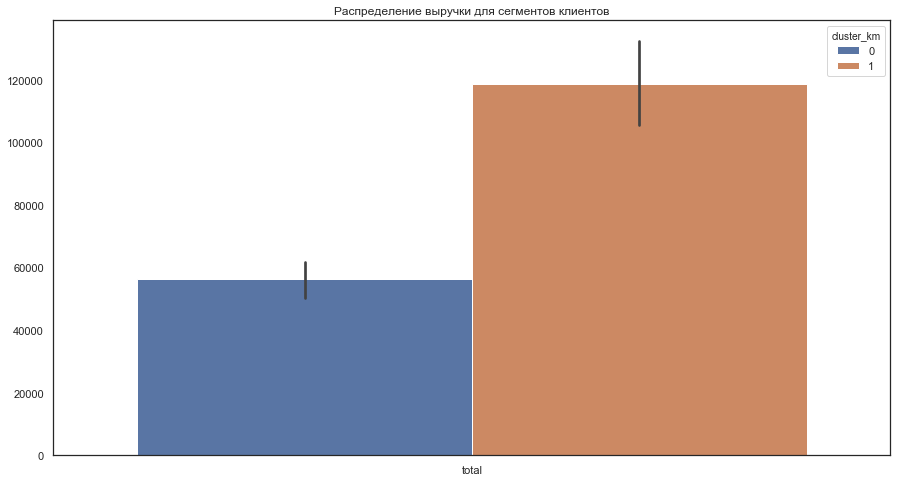

In [79]:
#посмотрим на распределения выручки
melted_1 = pd.melt(clusters, id_vars = ['cluster_km'], value_vars = ['total'])
plt.rcParams.update({'font.size': 13})
plt.figure(figsize = (15,8))
ax = sns.barplot(x= 'variable' , y='value',  hue = 'cluster_km', data = melted_1)
plt.title('Распределение выручки для сегментов клиентов')
plt.xlabel(None)
plt.ylabel(None)
#plt.xticks(rotation = 45)
plt.show()

In [60]:
cluster_1 = clusters.query('cluster_km == "1"')
cluster_1

,quantity,total,unique,cluster_km,check
week,,,,,
6,297,110161.0,79,1,1394.443038
8,286,100899.0,95,1,1062.094737
9,471,92934.0,102,1,911.117647
10,205,92500.0,86,1,1075.581395
14,405,106249.0,85,1,1249.988235
16,307,110250.0,71,1,1552.816901
17,547,71965.0,82,1,877.621951
20,494,84640.0,71,1,1192.112676
22,555,94665.0,79,1,1198.291139


**Вывод:** данный кластер является более прибыльным для нас. Мы видим, что основная масса заказов совершается в первом и четвертом кварталах. Клиенты достаточно часто покупают и при этом средний чек достаточно высокий.

In [61]:
cluster_0 = clusters.query('cluster_km == "0"')
cluster_0

,quantity,total,unique,cluster_km,check
week,,,,,
1,65,43963.0,27,0,1628.259259
2,179,59105.0,44,0,1343.295455
3,118,79766.0,42,0,1899.190476
4,282,58108.0,53,0,1096.377358
5,101,59548.0,50,0,1190.960000
7,168,64815.0,80,0,810.187500
11,180,64842.0,63,0,1029.238095
12,365,62557.0,62,0,1008.983871
13,341,60995.0,56,0,1089.196429


**Вывод:** здесь наблюдается обратная ситуация, когда основная масса заказов приходится на 2 и 3 кварталы. Как правило, в этот период покупается больше всего товаров для сада, огорода и комнатных растений.

**Вывод:** В качестве основного инструмента для сегментации была использована кластеризация с числом кластеров = 2. Первый кластер показывает лучшие результаты по выручке и среднему чеку по сравнению с нулевым кластером. Для первого кластера свойствены покупки в 1 и 4 кварталах, как мы выяснили в EDA на данный период, как правило, приходятся в основном покупки хозтоваров, товаров для интерьера, кухни и пр.

<div class="alert alert-info" role="alert"> 

## 4. Проверка статистических гипотез <a class="anchor" id="stat"></a> 
</div>

H0: Средний чек 0-го кластера не отличается от среднего чека 1-го кластера.

H1: Средний чек 0-го кластера отличается от среднего чека 1-го кластера.

In [65]:
#посчитаем дисперсию для среза данных лояльных покупателей:
print('Дисперсия среза данных клиентов 0-го кластера:', np.var(cluster_0['check']))
#посчитаем дисперсию для среза данных обычных покупателей:
print('Дисперсия среза данных клиентов 1-го кластера:', np.var(cluster_1['check']))
print()
print('Соотношение дисперсий:', np.var(cluster_1['check'])/np.var(cluster_0['check']))

Дисперсия среза данных клиентов 0-го кластера: 86706.36026897679
Дисперсия среза данных клиентов 1-го кластера: 89559.09839799171

Соотношение дисперсий: 1.032901140356547


Мы видим почти равные дисперсии, соответственно никаких дополнительных параметров при проверке гипотез указывать не будем.

---
<div class="alert alert-block alert-success">

## Комментарий от наставника

Проверка очень кстати. Мало кто вспоминает про ее необходимость)
</div>

---

In [64]:
alpha = .05 # критический уровень статистической значимости
#сравним среднее по выборке

results = st.ttest_ind(cluster_0['check'], cluster_1['check'])

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу. Средний чек клиентов 0-го кластера отличается от среднего чека клиентов 1-го кластера')
else:
    print('Не получилось отвергнуть нулевую гипотезу. Средний чек клиентов 0-го кластера не отличается от среднего чека 1-го кластера')

p-value: 0.028704807691331588
Отвергаем нулевую гипотезу. Средний чек клиентов 0-го кластера отличается от среднего чека клиентов 1-го кластера


<div class="alert alert-info" role="alert"> 

## 5. Выводы <a class="anchor" id="read_data"></a> 
</div>

Проанализировав полученные данные, мы можем сделать следующие выводы и рекомендации для нашего интернет-магазина товаров для дома и быта "Пока все ещё тут":
1. Наблюдается значительная сезонность в предлагаемом ассортименте. Особенно она актуальна для категорий "товары для сада, огорода" и "комнатные растения".
2.  В целом почти по всем категориям наблюдается спад продаж по сравнению с предыдущим годом (октябрь 2018-2019 гг.)
3. Первый кластер - самый прибыльный. Клиенты, приносящие наибольшую прибыль, как правило, покупают в 1 и 4 кварталах. Это категории "хозтовары", "товары для кухни" и т.д. 
4. Соответственно для каждой группы клиентов предлагаем соответствующий ассортимент.
5. Одна из растущих категорий - это направление текстиля, значит необходимо развивать данную категорию.
6. Также у нас уникальный клиент, который покупает вантузы - его нужно держать на контроле, чтобы понять, что это за клиент, можно ли его развивать.
7. Для email-рассылки необходимо учитывать сезонность товаров (например, весна, лето - это категории для садоводства, зима - это хозтовары, товары для кухни и пр.), также учитывать день недели (например, в понедельник и среду направлять рассылки, чтобы клиенты на следующий день могли увеличить средний чек).